# Read Data

In [1]:
import pandas as pd
import numpy as np
from nltk import agreement
from scipy import stats
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt

In [2]:
emotions = ["joy", "sadness", "trust", "disgust", "fear", "anger", "surprise", "anticipation"]
anotator = ["Felix", "Charlotta", "Max"]

In [3]:
df = pd.read_csv("EA_assignm1_annotation-environment_combined - Tabellenblatt1.csv")

In [4]:
df = df.drop(columns=['ID', 'comment', 'Unnamed: 26', 'Unnamed: 27'])
# df["ID"] = df["ID"].astype(int)
df = df.rename(columns={"joy": "joy-Felix", "Unnamed: 2": "joy-Charlotta", "Unnamed: 3": "joy-Max"})
df = df.rename(columns={"sadness": "sadness-Felix", "Unnamed: 5": "sadness-Charlotta", "Unnamed: 6": "sadness-Max"})
df = df.rename(columns={"trust": "trust-Felix", "Unnamed: 8": "trust-Charlotta", "Unnamed: 9": "trust-Max"})
df = df.rename(columns={"disgust": "disgust-Felix", "Unnamed: 11": "disgust-Charlotta", "Unnamed: 12": "disgust-Max"})
df = df.rename(columns={"fear": "fear-Felix", "Unnamed: 14": "fear-Charlotta", "Unnamed: 15": "fear-Max"})
df = df.rename(columns={"anger": "anger-Felix", "Unnamed: 17": "anger-Charlotta", "Unnamed: 18": "anger-Max"})
df = df.rename(columns={"surprise": "surprise-Felix", "Unnamed: 20": "surprise-Charlotta", "Unnamed: 21": "surprise-Max"})
df = df.rename(columns={"anticipation": "anticipation-Felix", "Unnamed: 23": "anticipation-Charlotta", "Unnamed: 24": "anticipation-Max"})
df = df.dropna()

# Emotion-Agreement

## Kappa

In [5]:
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

def equal_distance(label1, label2):
    label1, label2 = int(label1), int(label2)
    return 0.0 if label1 == label2 else 1.0

def on_off_split(label1, label2):
    label1, label2 = int(label1), int(label2)
    if label1 > 0:
        label1 = 1
    else:
        label1 = 0
    if label2 > 0:
        label2 = 1
    else:
        label2 = 0
    return 0.0 if label1 == label2 else 1.0

def half_split(label1, label2):
    label1, label2 = int(label1), int(label2)
    if label1 > 1:
        label1 = 1
    else:
        label1 = 0
    if label2 > 1:
        label2 = 1
    else:
        label2 = 0
    return 0.0 if label1 == label2 else 1.0

Amount 100


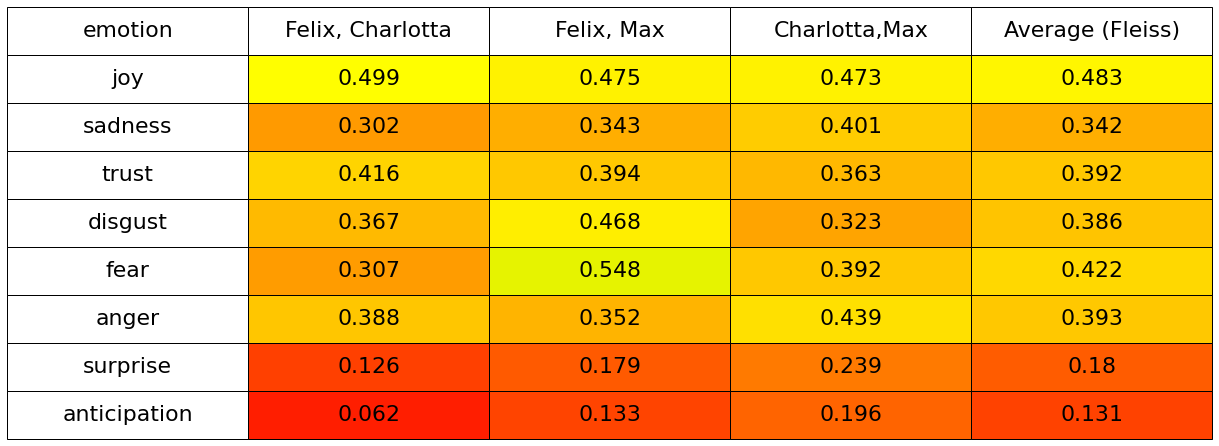

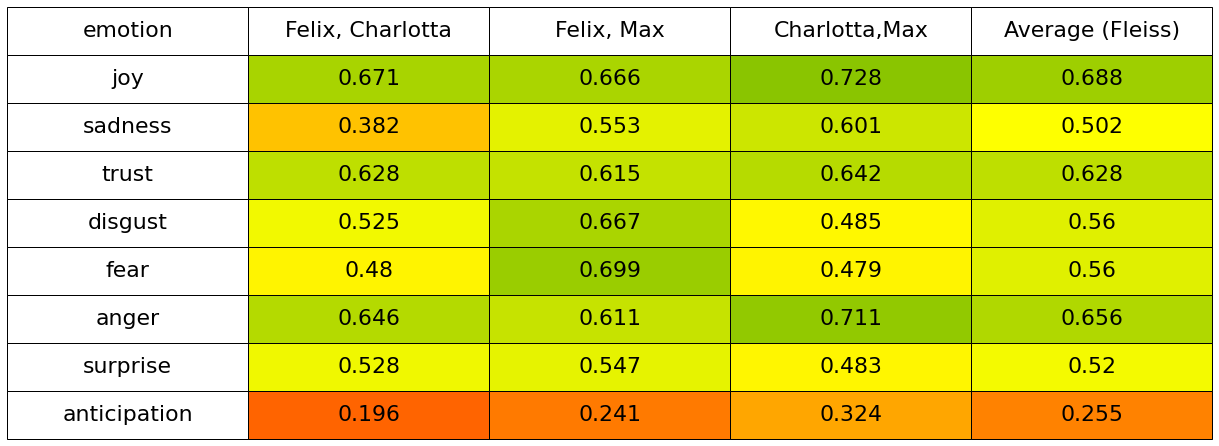

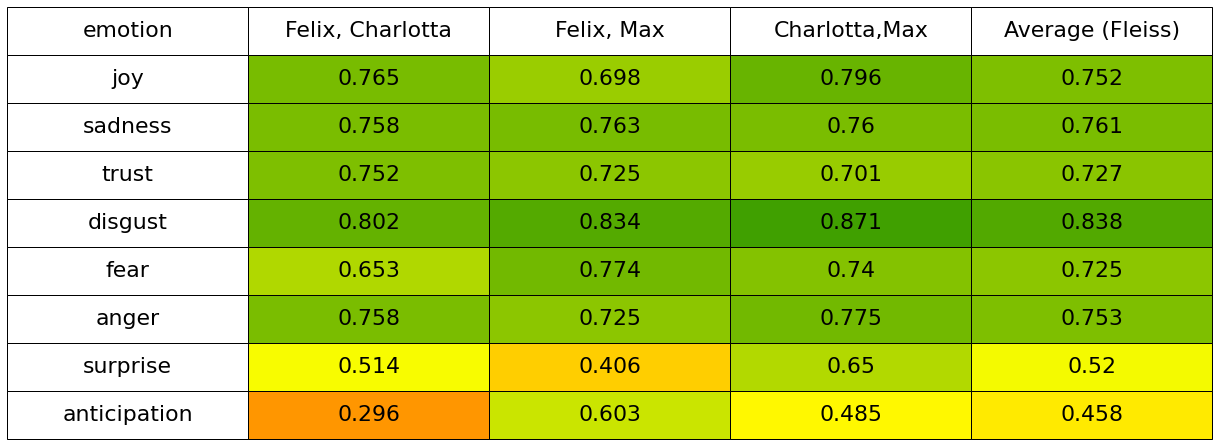

In [13]:
amount = len(df)
print("Amount", amount)

for distance in [equal_distance, on_off_split, half_split]:
    result = pd.DataFrame()
    for emotion in emotions:
        formatted_codes = [[1,i,df[emotion +"-Felix"].iloc[i]] for i in range(amount)] + [[2,i,df[emotion +"-Charlotta"].iloc[i]] for i in range(amount)]  + [[3,i,df[emotion +"-Max"].iloc[i]] for i in range(amount)]
        # data-input: (coder,item,label)
        ratingtask = agreement.AnnotationTask(data=formatted_codes, distance=distance)

        #print('Fleiss\'s Kappa:', emotion, ratingtask.multi_kappa())
        #print('Cohens\'s Kappa (Felix,Charlotta):', emotion, ratingtask.kappa_pairwise(1,2))
        #print('Cohens\'s Kappa (Felix,Max):', emotion, ratingtask.kappa_pairwise(1,3))
        #print('Cohens\'s Kappa (Charlotta,Max):', emotion, ratingtask.kappa_pairwise(2,3))
        #print('Krippendorff\'s Alpha:', emotion, ratingtask.alpha())
        new_row = {'emotion':emotion, 'Felix, Charlotta':ratingtask.kappa_pairwise(1,2), 'Felix, Max':ratingtask.kappa_pairwise(1,3), 'Charlotta,Max':ratingtask.kappa_pairwise(2,3), 'Average (Fleiss)':ratingtask.multi_kappa()}
        result = result.append(new_row, ignore_index=True)

    # calulcate colors
    color_values = cmap(result[['Felix, Charlotta', 'Felix, Max', 'Charlotta,Max', 'Average (Fleiss)']] )
    colors = np.ones((8, 4+1,4))
    colors[:,1:, :] = color_values

    # round values
    result[['Felix, Charlotta', 'Felix, Max', 'Charlotta,Max', 'Average (Fleiss)']] = result[['Felix, Charlotta', 'Felix, Max', 'Charlotta,Max', 'Average (Fleiss)']].round(3)

    # order columns
    result = result[['emotion', 'Felix, Charlotta', 'Felix, Max', 'Charlotta,Max', 'Average (Fleiss)']]

    fig = plt.figure()
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

    table=plt.table(cellText=result.values, colLabels=result.columns,
                    loc='center', cellLoc='center', colWidths = [0.18]*result.values.shape[1],
                    cellColours=colors)
    table.scale(4, 4)
    table.auto_set_font_size(False)
    table.set_fontsize(22)

    plt.savefig("emotion-eval-" + distance.__name__ + ".png", bbox_inches="tight")
    plt.show()

## Spearman

In [7]:
for emotion in emotions:
    print('Spearman correlation (Felix,Charlotta):', emotion, stats.spearmanr(df[emotion +"-Felix"], df[emotion +"-Charlotta"]))
    print('Spearman correlation (Felix,Max):',emotion, stats.spearmanr(df[emotion +"-Felix"], df[emotion +"-Max"]))
    print('Spearman correlation (Charlotta,Max):', emotion, stats.spearmanr(df[emotion +"-Charlotta"], df[emotion +"-Max"]))

Spearman correlation (Felix,Charlotta): joy SpearmanrResult(correlation=0.700969733942959, pvalue=4.669899372276767e-16)
Spearman correlation (Felix,Max): joy SpearmanrResult(correlation=0.6156030075196482, pvalue=9.368785312855526e-12)
Spearman correlation (Charlotta,Max): joy SpearmanrResult(correlation=0.7478076888556295, pvalue=3.936574274585101e-19)
Spearman correlation (Felix,Charlotta): sadness SpearmanrResult(correlation=0.4223118630882396, pvalue=1.2055205572540907e-05)
Spearman correlation (Felix,Max): sadness SpearmanrResult(correlation=0.6313726068383483, pvalue=1.890188495024603e-12)
Spearman correlation (Charlotta,Max): sadness SpearmanrResult(correlation=0.6117081210526012, pvalue=1.3723892529377018e-11)
Spearman correlation (Felix,Charlotta): trust SpearmanrResult(correlation=0.6464044411754779, pvalue=3.7668690497605594e-13)
Spearman correlation (Felix,Max): trust SpearmanrResult(correlation=0.6407851317901538, pvalue=6.956206144335677e-13)
Spearman correlation (Charlo

# uncertain annotations

In [8]:
def calculate_kappa(row):
    formatted_codes = list()
    for (i, emotion) in enumerate(emotions):
        formatted_codes += [[1,i,row[emotion +"-Felix"]]] + [[2,i,row[emotion +"-Charlotta"]]]  + [[3,i,row[emotion +"-Max"]]]
    #print(formatted_codes, "\n")
    # data-input: (coder,item,label)
    ratingtask = agreement.AnnotationTask(data=formatted_codes, distance=half_split)
    return ratingtask.multi_kappa()

df['row_kappa'] = df.apply(calculate_kappa, axis=1)

In [9]:
df.sort_values(by=['row_kappa'], ascending=True).iloc[:10][["text", "row_kappa"]]

,text,row_kappa
76,Not much changed.\n \n ... Until the fire nati...,-0.066667
44,"Having no place to go to be ""alone"". I guess I...",0.157895
29,The fact that you BOTH have annoying habits...,0.400000
70,He needs a fan to sleep. Drives me up the wall...,0.423423
80,My SO moved to my home state after a two month...,0.438596
53,There is now actual food in the fridge and pan...,0.448276
84,We both were pretty independent and knew how t...,0.454545
43,We fight way more now. I've always been an ind...,0.454545
64,My (woman) bathroom was never the same again. ...,0.466667
67,I met my SO when we were backpacking around Th...,0.466667


In [10]:
def calculate_min_max_diff(row):
    acc = 0
    values = list()
    for (i, emotion) in enumerate(emotions):
        values = [int(row[emotion +"-Felix"]), int(row[emotion +"-Charlotta"]), int(row[emotion +"-Max"])]
        acc += max(values) - min(values)
    return acc

df['min_max_diff'] = df.apply(calculate_min_max_diff, axis=1)

In [11]:
df.sort_values(by=['min_max_diff'], ascending=False).iloc[:10][["text", "min_max_diff"]]

,text,min_max_diff
49,The hair spiders in the shower have become a f...,10
36,I really had to cut down on the gaming... like...,9
26,The biggest was how much of a slob she was. I ...,9
34,I realized that as much as I hate cleaning up ...,8
43,We fight way more now. I've always been an ind...,8
20,"My house decluttered, fast.\n \n I was never d...",8
24,How fast food is eaten. It's the one thing I n...,7
12,I had to start being more clean and respecting...,7
81,"If you only have one bathroom, you will pray t...",7
82,My husband and I have lived together for 8 yea...,7
